- Technique which doesn't need any training data
- Can use pre-trained model to get information
- Should give total number of labels to classify the dataset
- Try to classify data automatically into given classes
- Uses Open AI clip model

- dog and cat dataset reference: https://github.com/laxmimerit/dog-cat-full-dataset.git

In [1]:
!pip install sentence_transformers

In [2]:
from sentence_transformers import SentenceTransformer,util
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch

In [12]:
dog_names=list(glob.glob('dog-cat-full-dataset-master/data/train/dogs/*.jpg'))[:100] #selecting 100 images from the training dataset

In [13]:
cat_names=list(glob.glob('dog-cat-full-dataset-master/data/train/cats/*.jpg'))[:100] 

In [14]:
img_names=dog_names+cat_names

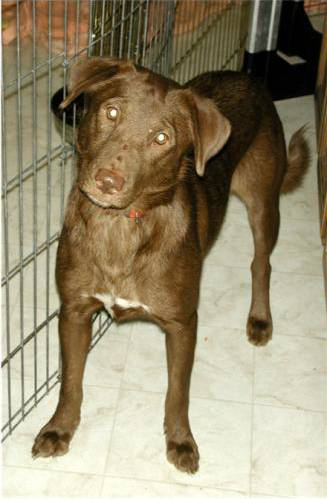

In [15]:
Image.open(img_names[0])

In [20]:
#shuffling of images 2-3 times
from random import shuffle
shuffle(img_names)

In [21]:
img_names

['dog-cat-full-dataset-master/data/train/dogs\\dog.10018.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10038.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10077.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10042.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10095.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10001.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10075.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10083.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10101.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10096.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10057.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10072.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10018.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.10072.jpg',
 'dog-cat-full-dataset-master/data/train/cats\\cat.10097.jpg',
 'dog-cat-full-dataset-master/data/train/dogs\\dog.1006

In [22]:
model=SentenceTransformer('clip-ViT-B-32')

In [23]:
img_embed=model.encode([Image.open(img) for img in img_names], batch_size=32,convert_to_tensor=True)

In [24]:
labels=['dog','cat']

label_embed=model.encode(labels,convert_to_tensor=True)
cos_scores=util.cos_sim(img_embed,label_embed)

In [25]:
cos_scores

tensor([[0.2199, 0.1521],
        [0.1813, 0.2306],
        [0.2293, 0.1658],
        [0.1806, 0.2269],
        [0.2289, 0.1679],
        [0.1688, 0.2197],
        [0.2471, 0.1768],
        [0.2323, 0.1827],
        [0.2340, 0.1571],
        [0.2104, 0.1499],
        [0.1676, 0.2087],
        [0.1824, 0.2331],
        [0.1773, 0.2283],
        [0.2084, 0.1430],
        [0.1639, 0.2083],
        [0.2450, 0.1772],
        [0.1579, 0.2090],
        [0.1656, 0.2160],
        [0.2326, 0.1761],
        [0.2128, 0.1293],
        [0.1942, 0.2391],
        [0.1680, 0.2151],
        [0.1878, 0.2303],
        [0.1752, 0.2283],
        [0.2125, 0.2262],
        [0.1749, 0.2235],
        [0.2268, 0.1535],
        [0.2385, 0.1976],
        [0.2611, 0.1923],
        [0.2390, 0.1715],
        [0.2352, 0.1700],
        [0.2209, 0.1576],
        [0.2245, 0.1494],
        [0.1662, 0.2187],
        [0.2322, 0.1549],
        [0.2307, 0.1761],
        [0.2221, 0.1674],
        [0.2177, 0.1445],
        [0.2

In [26]:
len(cos_scores) #total of 100 dogs, 100 cats

200

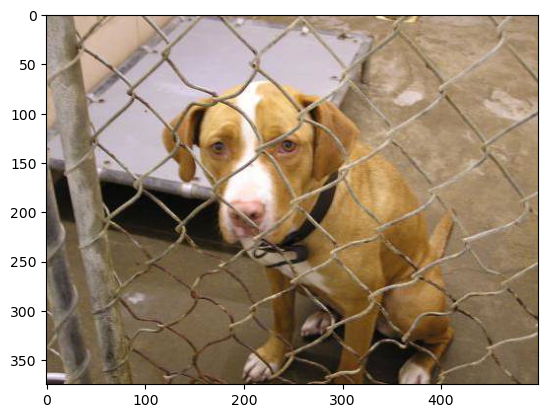

Predicted Label:  dog
----------------------




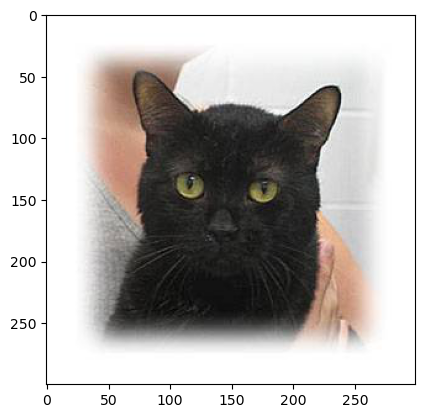

Predicted Label:  cat
----------------------




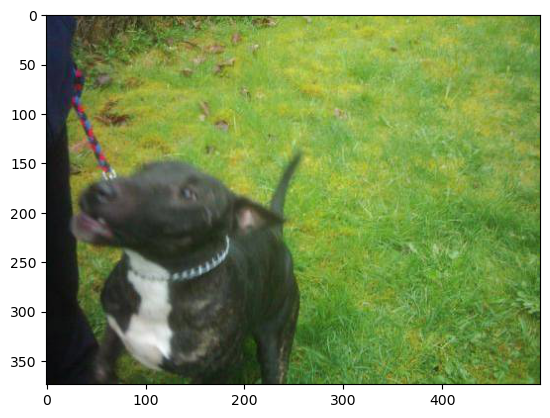

Predicted Label:  dog
----------------------




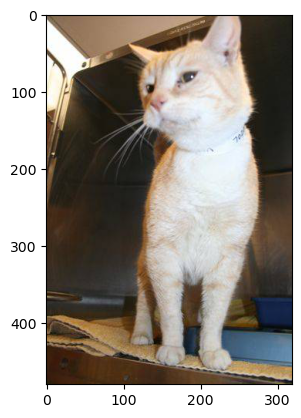

Predicted Label:  cat
----------------------




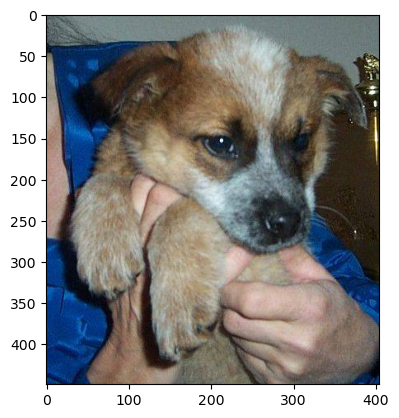

Predicted Label:  dog
----------------------




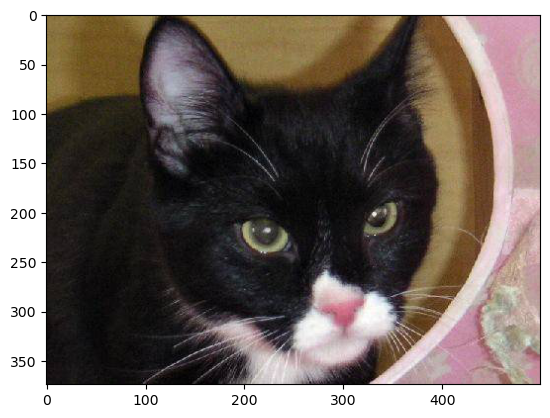

Predicted Label:  cat
----------------------




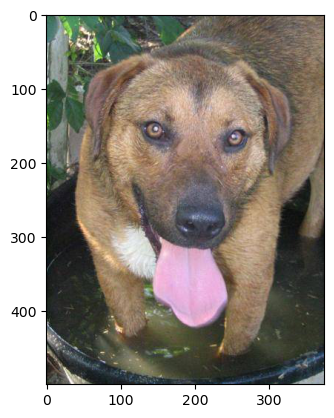

Predicted Label:  dog
----------------------




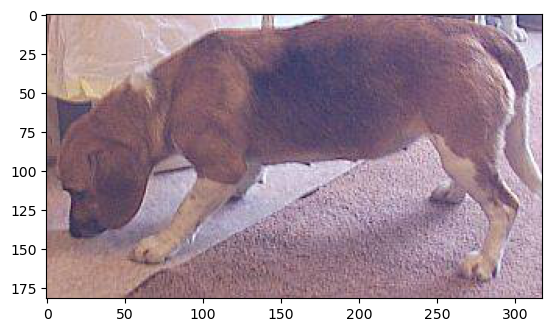

Predicted Label:  dog
----------------------




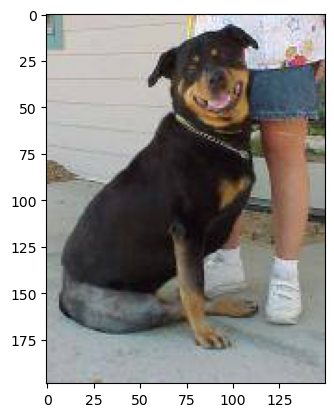

Predicted Label:  dog
----------------------




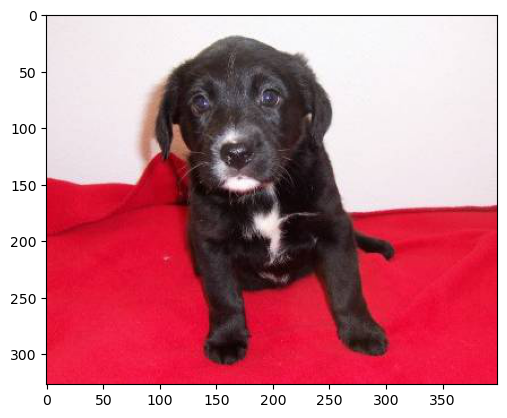

Predicted Label:  dog
----------------------




In [29]:
pred_labels=torch.argmax(cos_scores,dim=1) #making it either 0 or 1
for img_name,pred_label in zip(img_names[:10],pred_labels[:10]):
    im=Image.open(img_name)
    plt.figure()
    plt.imshow(im)
    plt.show()
    print('Predicted Label: ',labels[pred_label])
    print('----------------------\n\n')